In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(rc={'figure.figsize':(18.7,8.27)})

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jessica-ngce/311Data_Sept2022/main/Manhattan_Sept_Cleaned.csv').drop(columns='Unnamed: 0')

In [ ]:
df.shape

(34840, 28)

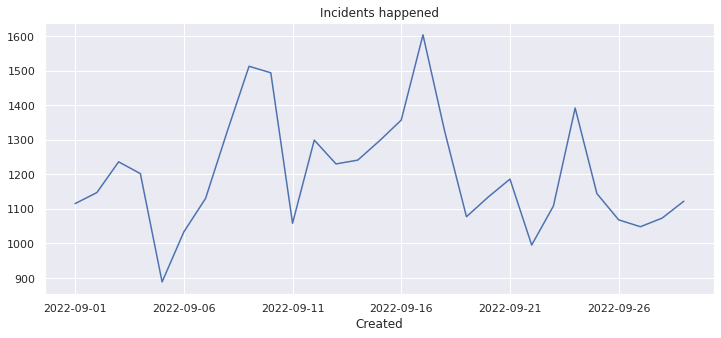

In [ ]:
happened_incidents = df.groupby('Created').size().plot(figsize=(12,5), title='Incidents happened')

In [ ]:
# drop NA values
df.isnull().sum()
df = df[(df['Location Type'].notnull())& (df['Incident Zip'].notnull()) & (df['Address Type'].notnull()) & (df['Resolution Description'].notnull())]

In [ ]:
# duration = Closed Date - Created Date
# duration in minutes 
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location,Closed,Created,Duration
0,55266970,2022-09-01 00:24:45,2022-09-01 00:26:44,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10031.0,620 WEST 141 STREET,...,239545.0,MOBILE,Unspecified,MANHATTAN,40.824162,-73.952978,"(40.82416166479311, -73.95297805704422)",2022-09-01,2022-09-01,1.98
1,55265838,2022-09-01 00:20:32,2022-09-01 00:27:05,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10031.0,605 RIVERSIDE DRIVE,...,238979.0,ONLINE,Unspecified,MANHATTAN,40.822609,-73.955859,"(40.82260929374083, -73.95585879265833)",2022-09-01,2022-09-01,6.55
2,55269398,2022-09-01 00:07:49,2022-09-01 00:31:31,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10029.0,2003 2 AVENUE,...,226645.0,ONLINE,Unspecified,MANHATTAN,40.788751,-73.943823,"(40.78875062047695, -73.943823243559)",2022-09-01,2022-09-01,23.70


In [ ]:
# Drop columns
df1 = df.copy()
df1 = df1.drop(columns=['Unique Key','Agency Name','Borough','Resolution Action Updated Date','City','Street Name','X Coordinate (State Plane)','Y Coordinate (State Plane)',
                        'Incident Address', 'Park Borough','Latitude','Longitude','Location','Address Type','Park Facility Name',
                        'Created Date','Closed Date','Closed','Created','Complaint Type','Community Board'])

df1.head()

,Agency,Descriptor,Location Type,Incident Zip,Resolution Description,Open Data Channel Type,Duration
0,NYPD,Loud Talking,Street/Sidewalk,10031.0,The Police Department responded to the complai...,MOBILE,1.98
1,NYPD,Loud Talking,Street/Sidewalk,10031.0,The Police Department responded to the complai...,ONLINE,6.55
2,NYPD,Loud Music/Party,Street/Sidewalk,10029.0,The Police Department responded to the complai...,ONLINE,23.70
3,NYPD,Detached Trailer,Street/Sidewalk,10016.0,The Police Department responded to the complai...,ONLINE,16.47
4,NYPD,Loud Talking,Residential Building/House,10016.0,The Police Department responded to the complai...,ONLINE,8.90


In [ ]:
df1.shape

(30429, 7)

## EDA & Feature Engineering

In [ ]:
# 11 agencies
df1.Agency.value_counts()

NYPD                                   19977
HPD                                     5098
DSNY                                    2170
DOT                                     1311
DCA                                      610
TLC                                      536
DPR                                      392
DOHMH                                    320
DOE                                       11
OFFICE OF TECHNOLOGY AND INNOVATION        3
DOITT                                      1
Name: Agency, dtype: int64

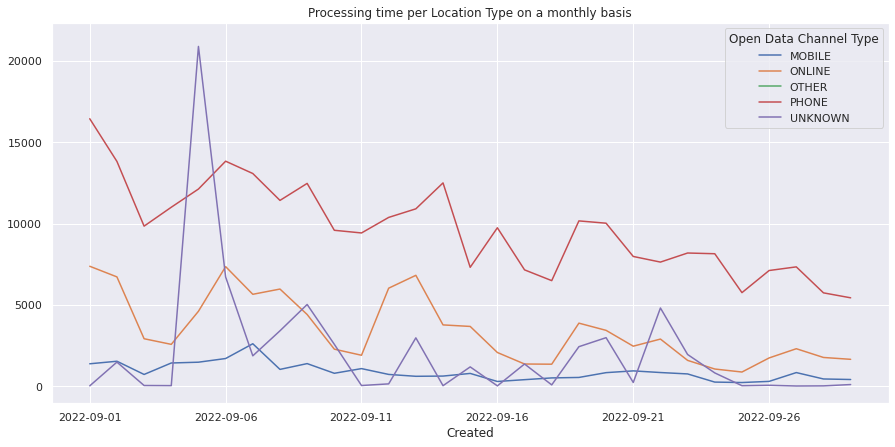

In [ ]:
df.groupby(['Created','Open Data Channel Type'])['Duration'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Location Type on a monthly basis');

In [ ]:
df1['Descriptor'].value_counts()

Loud Music/Party                 9319
Loud Talking                     1564
Banging/Pounding                 1514
Posted Parking Sign Violation    1491
Trash                             883
                                 ... 
Horse Drawn Carriage                1
Sewage Leak                         1
Unsanitary Condition                1
Unauthorized Tree Pruning           1
Debt Collection Agency              1
Name: Descriptor, Length: 309, dtype: int64

### Combined Location Type

In [ ]:
# agregate Location Type
df1['Location Type'] = df1['Location Type'].replace(['3+ Family Apartment Building','3+ Family Mixed Use Building','1-2 Family Mixed Use Building','Residence','1-2 Family Dwelling','3+ Family Apt. Building '],'Family Building')
df1['Location Type'] = df1['Location Type'].replace(['','Roof','Pool','Vehicle Lane','School/Pre-School','Government Building','House and Store','Hospital','Groomer','School Safety Zone',"Other (Explain Below)"],'Other')
df1['Location Type'] = df1['Location Type'].replace(['Parking Lot','Lot','Vacant Lot'],'Parking Lot/Garage') 
df1['Location Type'] = df1['Location Type'].replace(['Public Park/Garden','Public Garden','Park/Playground'],'Park') 
df1['Location Type'] = df1['Location Type'].replace(['Sidewalk','Street','Street/Curbside','Vehicle Lane','Bike Lane',],'Street/Sidewalk')


df1['Location Type'] = df1['Location Type'].replace(['Club/Bar/Restaurant','Commercial','Business'],'Store/Commercial')
df1['Location Type'] = df1['Location Type'].replace(['RESIDENTIAL BUILDING','Lobby'],'Residential Building/House')
df1['Location Type'] = df1['Location Type'].replace(['3+ Family Apt. Building','Yard','Vacant Lot'],'Family Building')

df1['Location Type'] = df1['Location Type'].replace(['Commercial Building','Vacant Building'],'Store/Commercial')
df1['Location Type'] = df1['Location Type'].replace(['Family Building',"Single Room Occupancy (SRO)",'Catch Basin/Sewer','Residential Property'],'Residential Building/House')
df1['Location Type'] = df1['Location Type'].replace(['Hallway','Curb','Crosswalk','Public/Unfenced Area',''],'Street/Sidewalk')
df1['Location Type'] = df1['Location Type'].replace(['Gutter','Alley','Stairwell','Intersection','Traffic Island or Median','Common Area'],'Other')


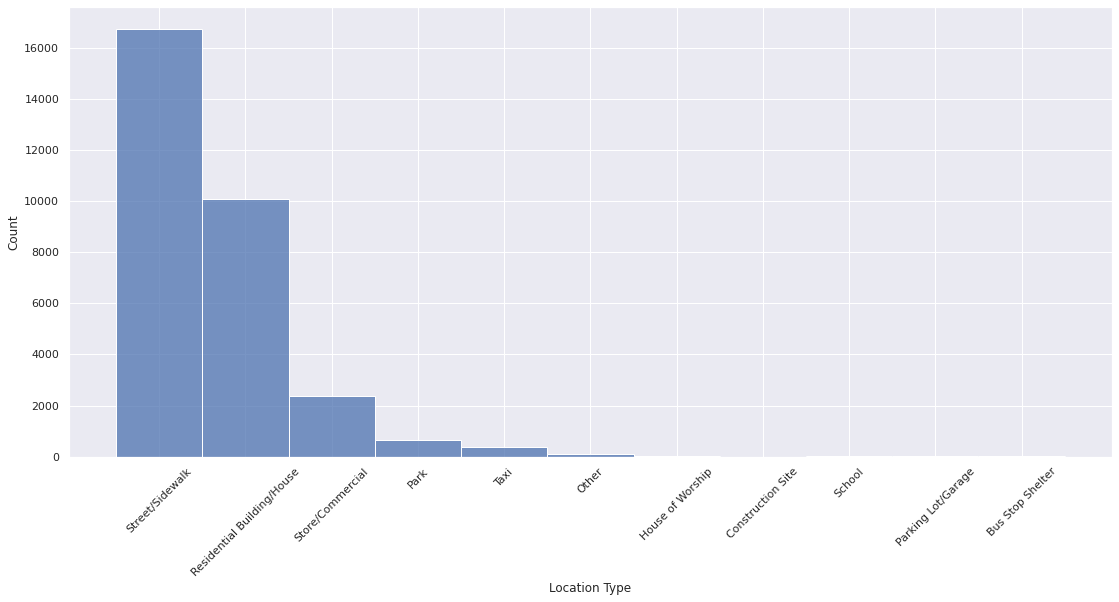

In [ ]:
location_plot = sns.histplot(df1['Location Type'],stat='count').set_xticklabels(labels=df1['Location Type'].unique(),rotation=45)

### Combined Descriptor Type

In [ ]:
small=df1['Descriptor'].value_counts() 
df1['Descriptor'] = np.where(df1['Descriptor'].isin(small.index[small <=10]), 'Other', df1['Descriptor'])


df1['Descriptor'] = df1['Descriptor'].replace(['Loud Music/Party','Loud Talking','Car/Truck Music','Plate Condition - Noisy','Loud Television'],'Noise')
df1['Descriptor'] = df1['Descriptor'].replace(['TOILET','Waste Set Out Too Early or Too Late','Defective Hardware','Removal Request','Paper License Plates','Trash or Recycling Not Secure','Trash or Recycling','Bulky Trash','Derelict Vehicles','MOLD','Waste Left in Front of Other Residence','Recycling - Metal/Glass/Rigid Plastic'],'Trash')

df1['Descriptor'] = df1['Descriptor'].replace(['PESTS','Rat Sighting','Dog Off Leash','Condition Attracting Rodents','Signs of Rodents','Mouse Sighting','Cat','Dog','Pigeon Waste','Rat or Mouse',
                                               'Pigeon Waste','Rat or Mouse','Dog Waste'],'Animals')
df1['Descriptor'] = df1['Descriptor'].replace(['DOOR','WALL','BASIN/SINK','CABINET','APARTMENT ONLY','FLOOR','REFRIGERATOR','ENTIRE BUILDING','CEILING','VENTILATION SYSTEM','WINDOW FRAME','BATHTUB/SHOWER','BELL/BUZZER/INTERCOM','Partial Access','DOOR FRAME','WIRING','RADIATOR'],'House')
df1['Descriptor'] = df1['Descriptor'].replace(['GARBAGE/RECYCLING STORAGE','Banging/Pounding','Posted Parking Sign Violation','Driver Complaint - Non Passenger','Sidewalk Zone Blocked','Commercial Overnight Parking','Double Parked Blocking Traffic','Parking Permit Improper Use'],'Traffic')

df1['Descriptor'] = df1['Descriptor'].replace(['Blocked Bike Lane','Blocked Crosswalk','Blocked Crosswalk','Blocked Sidewalk','With License Plate','Garage/Parking Lot'],'Traffic')
df1['Descriptor'] = df1['Descriptor'].replace(['Vendor','No Receipt','Out of Order','Retail Store','Mobile Food Vendor','Electronics/Phones','Unauthorized Bus Layover','Merchandise','Clothing/Glasses'],'Commercial')
df1['Descriptor'] = df1['Descriptor'].replace(['LIGHTING','POWER OUTAGE','NO LIGHTING','ELECTRIC/GAS RANGE','COOKING GAS','Compost','ENTIRE BUILDING','Engine Idling','WATER SUPPLY'],'Energy')

df1['Descriptor'] = df1['Descriptor'].replace(['Trash','SEWAGE','Recycling - Paper'],'Trash/Pollution')
df1['Descriptor'] = df1['Descriptor'].replace(['SMOKE DETECTOR','Inadequate Sweeping','Overflowing','HEAVY FLOW','FIRE ESCAPE','Chronic Dumping','DAMP SPOT','SLOW LEAK','Use Outside','Blocked Hydrant','Site Setup Condition','Cave-in','Broken Glass','Obstructing Public Use'],'Safety')

df1['Descriptor'] = df1['Descriptor'].replace(['Injured Wildlife','SEWAGE','Recycling - Paper'],'Animals')
df1['Descriptor'] = df1['Descriptor'].replace(['JANITOR/SUPER','No Private Carter','Private Carter Decal Not Posted','Driver Complaint - Passenger','Coin or Card Did Not Register','Police Report Not Requested','Branch or Limb Has Fallen Down','Bag/Wallet','No Access','Replacement Basket','Police Report Requested'],'Personal Issue')
df1['Descriptor'] = df1['Descriptor'].replace(['Street Not Swept','Rough, Pitted or Cracked Roads','Double Parked Blocking Vehicle','Street Zone Blocked','Sidewalk Violation','No Parking, Standing, Stopping','Failed Street Repair','Car/Truck Horn'],'Traffic')
df1['Descriptor'] = df1['Descriptor'].replace(['Use Indoor'],'House')
df1['Descriptor'] = df1['Descriptor'].replace(['Cone','Neglected','Other/Unknown'],'Other')

df1['Descriptor'] = df1['Descriptor'].replace(['Smoking','Unsafe Use of Playground','Branch Cracked and Will Fall','Entire Tree Has Fallen Down','Stop','Drag Racing','BBQ Outside Authorized Area','Blocked - Construction','Stoop Line','Broken Curb'],'Safety')
df1['Descriptor'] = df1['Descriptor'].replace(['Restaurant','Hotel'],'Commercial')
df1['Descriptor'] = df1['Descriptor'].replace(['Bus Stop','Line/Marking - After Repaving','Line/Marking - Faded','Sign'],'Traffic')
df1['Descriptor'] = df1['Descriptor'].replace(['MAILBOX','STAIRS','Home Improvement Contractor','STEAM PIPE/RISER','WINDOW GUARD BROKEN/MISSING','WINDOW PANE','Congestion/Gridlock'],'House')

df1['Descriptor'] = df1['Descriptor'].replace(["Other (complaint details)",'OUTLET/SWITCH','In Public'],'Other')
df1['Descriptor'] = df1['Descriptor'].replace(['Broken Sidewalk','Barrier Condition','Plate Condition - Shifted','St Name - Attached to Pole','SIGNAGE MISSING'],'Traffic')
df1['Descriptor'] = df1['Descriptor'].replace(['CARBON MONOXIDE DETECTOR','Chained to Public Property','Trespassing'],'Safety')
df1['Descriptor'] = df1['Descriptor'].replace(['Syringes','Trash Not Separated from Recycling','Waste Left in Front of Residence'],'Trash/Pollution')
df1['Descriptor'] = df1['Descriptor'].replace(['Unlicensed Vendors','Poster or Sign','Bodega/Deli/Supermarket'],'Commercial')


In [ ]:
df1['Descriptor'].value_counts()

Noise              11897
Traffic             6524
House               2809
Trash/Pollution     2344
Safety              2178
Animals             1184
Other               1118
Commercial           842
Energy               798
Personal Issue       735
Name: Descriptor, dtype: int64

### Create Duration Bin

In [ ]:
df1.Duration.describe()

count    30429.000000
mean      3957.372195
std       9026.257906
min          0.070000
25%         26.550000
50%         63.330000
75%       2677.650000
max      59476.620000
Name: Duration, dtype: float64

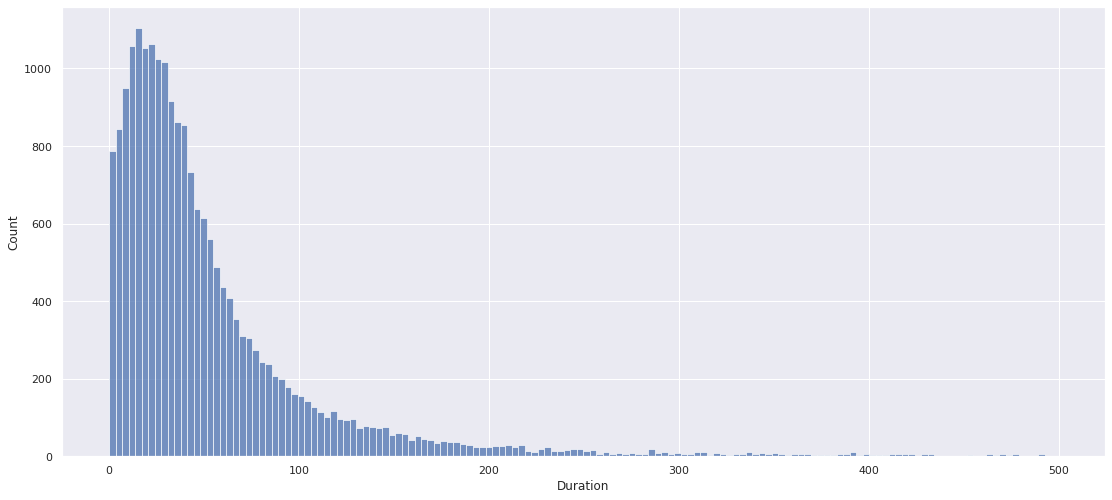

In [ ]:
sns.histplot(df1.Duration[df1.Duration < 500])

In [ ]:
## cut durations by IQR
df1['Duration Type'] = pd.qcut(df1['Duration'], q=4)
df1['Duration Type'].unique()

[(0.069, 26.55], (26.55, 63.33], (63.33, 2677.65], (2677.65, 59476.62]]
Categories (4, interval[float64, right]): [(0.069, 26.55] < (26.55, 63.33] < (63.33, 2677.65] <
                                           (2677.65, 59476.62]]

### Add Resulotion Type

In [ ]:
fixed = ['The Police Department responded to the complaint and took action to fix the condition.',
         'The Police Department reviewed your complaint and provided additional information below.',
         'The Department of Transportation inspected the condition you reported. You can find additional information in the "Notes to Customer" field.',
         'NYC Parks has completed the requested work order and corrected the problem.',
         'The Department of Sanitation cleaned the location.',
         'The reported condition was inspected and a summons has been issued.',
         'The Police Department issued a summons in response to the complaint.',
         'The Police Department responded to the complaint and a report was prepared.',
         'NYC Parks performed the work necessary to correct the condition.',
         'The Department of Transportation has completed the request or corrected the condition.',
         'The Department of Transportation inspected the condition and sent notice to responsible party. Temporary repairs were made to make the area safe.',
         'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.',
         'NYC Parks has reviewed the reported condition and corrected the problem.',
         "The Department of Housing Preservation and Development conducted or attempted to conduct an inspection.  More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.",
         'The Department of Sanitation has investigated the complaint and addressed the issue. If the problem persists, call 311 to enter a new complaint. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).',
         'The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.',
         'The Department of Sanitation investigated this complaint and issued a Notice of Violation.',
         'The Police Department made an arrest in response to the complaint.',
         'The Department of Transportation inspected the condition you reported and found that the condition meets its standards and/or there is a valid permit to conduct work.',
         'The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.',
         'The Department of Transportation recently inspected this site and found it to be in-compliance or took necessary action.',
         'The Department of Education completed the work and corrected the condition.',
         'The Department of Transportation inspected the condition, sent notice to responsible party, and temporary repairs were made to make the area safe.',
         'The Department of Sanitation removed the items.',
         'The Department of Housing Preservation and Development contacted an occupant of the apartment or building and verified that the complaint was addressed.  The complaint has been closed.',
         'The company has been asked to clean the pay phone.',
         'A Litter Basket was placed at the location.',
         "The Department of Housing Preservation and Development has closed this complaint administratively. More information can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.",
         'The Department of Transportation has removed the items.',
         'The Department of Transportation has repaired the bike rack.',
         'The Department of Sanitation collected the requested items.']

no_violation = ['The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.',
                'The Police Department responded to the complaint and determined that police action was not necessary.',
                'The Police Department responded and upon arrival those responsible for the condition were gone.',
                'Upon inspection the reported condition was not found, and, therefore, no action was taken.',
                'The Department of Transportation inspected the condition and issued a Corrective Action Repair (CAR) to the contractor or utility company. The responsible party has a maximum of 30 days to correct the condition. If the condition still exists, a summons will be issued. In some cases, the Department of Transportation will make the repairs and charge the responsible party for the costs.',
                'The Department of Transportation inspected the condition you reported and determined that it requires general maintenance. The details have been processed into another system and it is expected to be repaired in a future project.',
                'Based on the information provided by the customer, the Taxi and Limousine Commission has determined that a hearing is not necessary or not possible.',
                'The Department of Sanitation investigated and the vehicle owner claimed the vehicle, therefore it could not be classified as abandoned and derelict.',
                'The Department of Sanitation investigated this complaint and found no violation at the location.',
                'The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.',
                'The Department of Sanitation investigated this complaint and no DSNY related conditions/violations were observed. Location will be referred to the appropriate agency for further action.',
                'NYC Parks inspected the condition and determined that no work was needed.',
                'The Department of Sanitation investigated and found the vehicle to have license plates, therefore it did not meet the criteria to be classified as an abandoned derelict vehicle.',
                'No action was taken because the agency determined the condition reported was within acceptable parameters for park/city use.',
                'The Department of Transportation inspected the location for the condition you reported and could not find the problem. It you would like to pursue the complaint, please call 311 or (212) 639-9675 with additional information.',
                'The Department of Transportation inspected the condition and determined it was in compliance with their standards, not hazardous, or a valid permit exists.',
                "The Department of Transportation's inspectors could not find the condition you reported. If you would like to pursue the complaint, please check the address and submit a new Service Request.",
                "The complaint was withdrawn per the customer's request.",
                'NYC Parks visited the site and inspected the condition. No work is necessary at this time.',
                'The Department of Health and Mental Hygiene has investigated the complaint and no violations were cited.',
                'The condition was inspected and it was in compliance with Department of Transportation standards, not hazardous, or a valid permit exists.',
                "The Department of Sanitation (DSNY) couldn't find the condition. Please file a new Service Request with more details about the location.",
                'The Department of Sanitation Investigated and found that the vehicle was on private property.',
                'NYC Parks determined that the requested site is ineligible for the Trees and Sidewalks Program, because the tree is not adjacent to a 1-, 2-, or 3-family home (NYC Tax Class 1 property).   You can repair the sidewalk yourself by hiring an independent contractor. The contractor must complete a Tree Work Permit application on the NYC Parks website',
                "The Department of Transportation's inspectors could not find the address you reported. If you would like to pursue the complaint, please check the address and submit a new Service Request.",
                'NYC Parks attempted to inspect the reported condition but could not find the location. Please file a new Service Request with adequate site details, including a full street address and descriptive location information.',
                'The Department of Sanitation investigated and found that the bike did not meet the criteria to be classified as derelict.',
                'The location does not meet the criteria for Litter Basket placement.',
                'NYC Parks inspected and determined that the site is ineligible for the Trees and Sidewalks Program because of one or more of the following reasons:  - The property adjacent to the sidewalk is not in Tax Class 1 - The property adjacent to the sidewalk is not owner-occupied - The property adjacent to the sidewalk contains a place of business  You can repair the sidewalk yourself by hiring an independent contractor. The contractor must complete a Tree Work Permit application on the NYC Parks website.',
                'The Department of Housing Preservation and Development responded to a complaint of no heat or hot water. Heat was not required at the time of the inspection. No violations were issued. If the condition still exists, please file a new complaint.',
                'UNDER SECTION 2904 OF THE New York City Charter and Section 19-152 of the New York City Administrative Code, the property owner is responsible for maintaining, repairing and installing sidewalks adjoining their properties. The Department of Transportation has inspected the location and issued a violation to the property owner.',
                'The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint.',
                'The Department of Sanitation investigated this complaint and found no condition at the location.',
                'Unfortunately, the behavior that you complained about does not violate any law or rule. As a result, no city agency has the jurisdiction to act on the matter.',
                'The Department of Sanitation Investigated and found that the vehicle was not at the reported location.',
                'The Department of Health and Mental Hygiene has investigated the Service Request. No Health Code violations or health hazards were noted. No further action is needed.',
                'NYC Parks determined that the requested location cannot receive a new tree because of conflicts with surrounding infrastructure.',
                'The Department of Transportation inspected the condition and determined that it is in compliance with its standards.',"The Department of Transportation's inspectors could not find the address you reported. If you would like to pursue the complaint, please check the address and call 311 or (212) 639-9675 with updated location information.",
                'The Department of Health and Mental Hygiene investigated the complaint and did not find any Health Code violations or health hazards. No further action is necessary.',
                'The owner claimed the bicycle was not abandoned.']


notmybusiness = ["This complaint does not fall under the Police Department's jurisdiction.",
              "The condition was inspected and determined not to be under Department of Transportation's jurisdiction. The Department of Transportation notified the appropriate responsible party of the complaint.",
              'NYC Parks determined that another entity needs to handle the condition. They have notified the appropriate resource.',
              'NYC Parks inspected and determined the issue was out of its jurisdiction. The condition may be on private property or in an area serviced by another organization.',
              'The Department of Transportation inspected and has requested the Department of Environmental Protection address the issue. The condition will be re-inspected in 60 days.',
              'The Department of Consumer Affairs (DCA) received your report. DCA will investigate your request and work with other relevant City agencies to resolve it. If necessary, the City will take enforcement action.   To check the status of your complaint, call 311 with your Service Request Number.',
              'The Department of Transportation inspected the condition you reported and determined that it requires general maintenance. The details have been processed into another system and it is expected to be repaired in a future project.',
              'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the Department of Buildings. 311 can help you file a complaint or contact the agency for further assistance.',
              'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the Federal Communications Commission. You can call (888) 225-5322.',
              "NYC Parks couldn't respond to your complaint because they had to devote resources to other critical services at the time. The agency will use your complaint for future planning.",
              'The agency was unable to respond to this complaint because they allocated resources to other critical services at the time. All complaints are used for future enforcement planning.',
              'The Department of Transportation inspected the condition you reported and determined that this issue is not within its jurisdiction.',
              'The Department of Transportation has determined that this issue is not within its jurisdiction. It has been referred to the Metropolitan Transportation Authority.',
              'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the Commission on Human Rights. 311 can help you file a complaint or contact the agency for further assistance.',
              'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the New York State Dept. of Agriculture & Markets. You can call (800) 554-4501.',
              'This request required re-assignment to a new DOT unit.',
              'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the Department of Health and Mental Hygiene. 311 can help you file a complaint or contact the agency for further assistance.',
              'Your complaint was referred to the vendor, CityBridge.',
              'The Department of Transportation has determined that this issue is not within its jurisdiction.',
              'The Department of Education reviewed the complaint and determined that there is insufficient information to act on. If the condition persists please file a new service request with more details.',
              'The Department of Consumer Affairs has determined that this issue should be referred to the New York State Office of the Attorney General. Customers may call (800) 771-7755 for more information.',
              'The vehicle did not meet the criteria to be classified as derelict and the Department of Sanitation referred it to NYPD to be addressed by their Rotation Tow Program.',
              'The Department of Transportation inspected the condition you reported and issued a notice to the responsible party to correct the condition.',
              'The Department of Health and Mental Hygiene has reviewed the Service Request and has referred it to another agency or organization.',
              'Your complaint has been received by the Police Department and additional information will be available later.',
              'The Department of Health and Mental Hygiene has reviewed the Service Request and has referred it to another agency or organization.',
              'Thank you for your report. The Department of Health and Mental Hygiene will use the information that you provided to help track and control mosquito populations throughout the City. No further information will be available from 311 on your report.',
              'NYC Parks visited the location but could not find the tree condition you reported.',
              "The Department of Consumer Affairs has determined that this issue should be referred to the New York State Education Department's Office of the Professions. Customers can call (800) 442-8106.",
              'The Department of Education determined that this complaint is not within its jurisdiction because it concerns a private school. Please contact the private school directly.',
              'The Department of Consumer Affairs has determined that this issue should be referred to the New York State Banking Department. Customers can call (877) 226-5697.',
              'The Department of Transportation has determined that this issue is not within its jurisdiction. It has been referred to the New York City Police Department.',
              'NYC Parks inspected the condition and determined that the issue is out of their jurisdiction.',
              'The Department of Transportation determined that this issue is not within its jurisdiction. It was referred to the Department of Consumer Affairs.',
              'The Department of Consumer Affairs has determined that this issue should be referred to the Court System. The customer may choose to pursue the complaint in court.'
              'The Department of Education determined that this complaint concerns a charter school and forwarded it to the Office of Charter Schools. The Office of Charter Schools will contact you, or you may follow up with them directly.',
              "NYC Parks didn't take action because the issue you reported is out of their jurisdiction.",
              'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the New York State Department of Transportation. You can call (518) 457-6195.',
              'The Department of Transportation has determined that this issue is not within its jurisdiction. It has been referred to the Department of Parks and Recreation.',
              'The Department of Sanitation investigated and found this complaint to be out of jurisdiction. The Department of Sanitation reviewed this and found it not to be meeting the criteria for a complaint or service request.',
              'The Department of Transportation has determined that this issue is not within its jurisdiction. It has been referred to the Department of Design and Construction.',
              'The Department of Transportation determined that this issue is not within its jurisdiction. It was referred to the Department of Health and Mental Hygiene.',
              'This Service Request is not within the Department of Sanitationâ\x80\x99s jurisdiction and/or was found to be unsubstantiated.',
              'No action was taken because NYC Parks determined that the issue is out of its jurisdiction. The condition may be on private property or in an area serviced by another organization.',
              'The Department of Consumer Affairs has determined that this issue should be referred to the Court System. The customer may choose to pursue the complaint in court.',
               'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the New York Police Department. 311 can help you file a complaint or contact the agency for further assistance.',
               'The Department of Consumer Affairs has determined that this issue should be referred to the Court System. The customer may choose to pursue the complaint in court.',
               'The Department of Education determined that this complaint concerns a charter school and forwarded it to the Office of Charter Schools. The Office of Charter Schools will contact you, or you may follow up with them directly.',
               'The Department of Health and Mental Hygiene has reviewed the complaint and has referred it to another Office/Bureau/Agency',
               'The Department of Consumer Affairs has determined that this issue is not within its jurisdiction and should be referred to the Department of Motor Vehicles. You can call (518) 486-9786.']


followup = ['The Department of Consumer Affairs has already mailed you a complaint form. In order for DCA to be able to help, you must complete that form and return it to DCA along with requested documentation. DCA will contact you approximately 30 days after receiving your complete complaint which we must forward to the reported business for its response. If you do not receive the complaint form within 15 days from the date of your initial request, please call 311 back.',
            'The Department of Sanitation will address the situation at the location by providing educational outreach about proper sanitation procedures.',
            'The Department of Transportation inspected the condition and issued a summons to the responsible party. A re-inspection will be done within 10 days. If the condition still exists, a second summons will be issued. In some cases, the Department of Transportation will make the repairs and charge the responsible party for the costs.',
            'The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.',
            'Thank you for your report. It will help the City ensure that the vaccine mandate is being enforced safely.',
            'The Department of Transportation inspected the condition you reported. It has been entered into the maintenance system. It will be repaired within 30 days.',
            'The Department of Consumer Affairs is scheduling an inspection which will take place within 35 days. Please do not file duplicate complaints or call to check results during this time. After 35 days, call 311 with your Service Request Number and ask for Service Request Status - DCA.',
            'NYC Parks created a work order for the tree condition.  Please note that addressing this work can take up to a year or more depending on the higher priority work identified during this period and resources available to address this work.    NYC Parks work priority categories range from Category A through D, with A being the most critical and time-sensitive. We will complete all work in Category A first and address work in lower priority categories in accordance with available resources. For more information about the Tree Risk Management Program, visit the NYC Urban Forest page on the NYC Parks website at nyc.gov/parks/trees.   Alternatively, you may choose complete the work yourself by hiring an independent contractor. The contractor must complete a Tree Work Permit application on the NYC Parks website at nyc.gov/parks/trees.',
            'The Department of Transportation inspected this location and determined that the establishment has 24 hours to come into compliance.',
            'The contractor has reported that the requested work has been completed.',
            'The Department of Sanitation will note this location for periodic surveillance, which may take place at various times.',
            'The Department of Sanitation periodically conducted surveillance at the location and during those times no violations were observed.',
            'A sidewalk dismissal inspection (work done by owner) has been scheduled. Department of Transportation is in direct contact with the responsible party.',
            'The Department of Transportation is unable to schedule a sidewalk dismissal inspection because there is no record of a permit to make a sidewalk repair. Owner must obtain a permit of record. Once a permit is obtained, the owner must call 3-1-1 to make another request for sidewalk dismissal - work done by owner.',
            'The Department of Transportation inspected this location and determined that the establishment must remove all of the items immediately.',
            'The Department of Sanitation has removed illegal postings from the location. The Department will issue a Notice of Violation to the responsible party once it is identified.',
            'The Department of Transportation inspected the condition you reported. You can find additional information in the "Notes to Customer."',
            'The Department of Transportation inspected the condition and made the determination that the street meets resurfacing standards and will be planned for either the next or future resurfacing seasons (2 - 3 years). The Department of Transportation works with Community Boards and elected officials to determine resurfacing priority. For specific scheduling information regarding your street, contact your Community Board.',
            'The Department of Transportation determined that the establishment is operating without authorization, and it was notified to register in the Open Restaurant Program.',
            "The Department of Sanitation (DSNY) inspected the lot and notified the property owner that they must clean it. At the agency's follow-up inspection, they found the lot was clean.",
            'The personnel involved in the incident were counseled and reminded of the proper procedures to follow.',
            'The Department of Housing Preservation and Development inspected the following conditions. A Section 8 Failure was issued. Both the tenant and the property owner will receive a notice in the mail regarding the details of the Failure and the resulting action by the Agency.',
            'The DOHMH has investigated the complaint and issued a Notice of Violation. The agency will continue to monitor.',
            'The Department of Sanitation observed illegal postings at the location. The Department will issue a Summons to the responsible party once it is identified.',
            'The Department of Transportation inspected the location more than six months ago and has notified the property owner of any defective sidewalk conditions. The property owner is responsible for maintaining, repairing and installing sidewalks adjoining their property, according to Section 19-152 of the New York City Administrative Code.',
            'Under NYC Parksâ\x80\x99 Tree Risk Management Program, work is prioritized to address the conditions with the highest risk first.  NYC Parks determined that the issue will be addressed in the next pruning cycle through the routine block pruning program.  For more information about the Tree Risk Management Program, visit the NYC Urban Forest page on the NYC Parks website at nyc.gov/parks/trees.   To learn more about the trees in your neighborhood, visit the NYC Tree Map at nyc.gov/parks/treemap.',
            'The Department of Transportation will inspect the complaint location and notify the property owner within 180 days if a defective sidewalk condition exists. The property owner is responsible for maintaining, repairing and installing sidewalks adjoining their property, according to Section 19-152 of the New York City Administrative Code.',
            'The Department of Transportation inspected the condition you reported and issued a Corrective Action Repair (CAR) to the contractor or utility company. The responsible party has a maximum of 30 days to correct the condition. If after that time the condition still exists, the Agency may issue the responsible party a summons and/or correct the condition.',
            'The Department of Transportation inspected the condition and issued a notice to the responsible party to correct the condition.',
            'The location was inspected and is suitable for tree planting. Barring any unforeseen issues such as underground utilities and based on available funding, the requested tree will be placed on an upcoming contract. Please note that this process can take up to two years, depending on capacity and the location.   To find out where and when trees will be planted, please visit the Tree Work Hub at nyc.gov/parks/treework.  To learn more about the trees in your neighborhood, visit the NYC Street Tree Map at nyc.gov/parks/treemap.',
            'The Department of Transportation will inspect the condition to determine if the location can be added to a curb contract (3-5 years). The property owner will be notified if there are sidewalk defects. Property owners are responsible for repairing and installing sidewalks adjoining their property, according to Section 19-152 of the NYC Administrative Code. Community Boards and elected officials may contribute funding for curb, affecting timeframe for construction.',
            'The Department of Transportation has denied the sidewalk re-inspection request. The request to re-inspect is past the 75 day original notification period. The property owners are responsible for maintaining, repairing and installing sidewalks adjoining their properties.',
            'NYC Parks will inspect the site to determine if it is suitable for a new street tree, including a review of potential conflicts with other infrastructure. If the site is found to be suitable, a tree will be planted during the next available planting season. You may review recently completed and upcoming street tree plantings in your neighborhood by visiting the NYC Parks Tree Work Hub at nyc.gov/parks/treework.',
            'See notes for information.',
            "The Department of Sanitation (DSNY) found that the lot isn't eligible for cleaning. A non-City government agency is using the property. DSNY will notify the agency to correct the condition."]

info_needed = ['Your request can not be processed at this time because of insufficient contact information. Please create a new Service Request on NYC.gov and provide more detailed contact information.',
               'Your complaint was referred to the Department of Consumer Affairs. There was insufficient information and the Department was not able to act on the matter.',
               "NYC Parks couldnâ\x80\x99t respond to your complaint because they didn't have enough information about the condition or location.  If the problem still exists and you would like to pursue this complaint, please submit a new Service Request with a more detailed description of the condition and/or location.",
               'The Department of Housing Preservation and Development was not able to gain access to your apartment or others in the building to inspect for a lack of heat or hot water. The complaint has been closed. If the condition still exists, please file a new complaint.',
               'The request submitted did not have sufficient information for the Department of Transportation to respond.',
               'The Department of Housing Preservation and Development was not able to gain access to your apartment to inspect for a lack of heat or hot water. However, HPD was able to verify that heat or hot water was inadequate by inspecting another apartment and a violation was issued. Information about specific violations is available at www.nyc.gov/hpd.',
               'The Department of Housing Preservation and Development was unable to access the rooms where the following  conditions were reported. No violations were issued. The complaint has been closed.',
               'The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 212 234 - 7485 (MANHATTAN).',
               'The Department of Housing Preservation and Development was unable to access the rooms where the following conditions were reported. No violations were issued. The complaint has been closed.',
               'The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint.',
               'The Service Request submitted did not have sufficient location or complaint information for NYC Parks to respond.  Please submit a new Service Request with adequate site details, including a full street address and descriptive location information.',
               'The Police Department responded to the complaint but officers were unable to gain entry into the premises.']

duplicated_report = ['The Department of Transportation inspected the condition you reported and determined that it requires general maintenance. The details have been processed into another system and it is expected to be repaired in a future project.',
                     'The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.',
                     'The Taxi and Limousine Commission (TLC) has determined that this complaint is a duplicate of another complaint on file. TLC has closed this complaint and is proceeding with the other complaint.',
                     "The Department of Sanitation (DSNY) found an open Service Request already exists for the same location.   DSNY's system can't accept more than one complaint per address at a time. Your Service Request has been closed. DSNY will address the Service Request that was filed previously.  If you filed that Service Request, you can get the status with your Service Request number at nyc.gov/311 or by calling 311.  If you didn't file it, you can get the status by calling DSNY at (212) 291-1220.",
                     'The Department of Sanitation found an open service request already exists for the same location.',
                     'This service request was closed because the Department of Health and Mental Hygiene received an earlier complaint about the same location.  You can find inspection results for this address by going to the online Rat Portal at www.nyc.gov/rats.',
                     'The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.gov/hpd.']



In [ ]:
# create new category
resolved_levels = [duplicated_report, info_needed, followup, notmybusiness, no_violation, fixed]
resolved_names = ['duplicated_report', 'info_needed', 'followup', 'referred', 'no_violation', 'fixed']

# Create Dictionary
resolved_dict = {}
for index, arr in enumerate(resolved_levels):
  for s in arr:
    resolved_dict[s] = resolved_names[index]


# Match categorical 
df1['Resolved Type'] = df1['Resolution Description'].map(resolved_dict).astype('category')
df1['Resolved Type'].unique()

['fixed', 'no_violation', 'referred', 'info_needed', 'followup', 'duplicated_report']
Categories (6, object): ['duplicated_report', 'fixed', 'followup', 'info_needed', 'no_violation', 'referred']

# k-mode Clustering
#### *The k-modes clustering algorithm is an extension of k-means clustering algorithm. The k-means algorithm is the most widely used centre based partitional clustering algorithm. It defines similar object that are close to each other in terms of Euclidean distance.* 

## K-means clustering:
1. Determine number of k 
2. Randomly assign point to each class 
3. Calculate centroid of each cluster 
4. Euclidean distance(Sqrt of sum of square distance) from each point to each centroid 
6. Reassign the value to the nearest centroid class
7. Repeat until convergence

## K-mode differs from k-means in:

*   using a simple matching dissimilarity measure for categorical objects
*   replacing means of clusters by modes
*   frequency-based method to update the modes



In [ ]:
#### K-mode
%pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

# Import module for data visualization
from plotnine import *
import plotnine

In [ ]:
dfgo = df1[['Descriptor','Duration Type','Resolved Type','Location Type']]

In [ ]:
dfgo.head()

,Descriptor,Duration Type,Resolved Type,Location Type
0,Noise,"(0.069, 26.55]",fixed,Street/Sidewalk
1,Noise,"(0.069, 26.55]",fixed,Street/Sidewalk
2,Noise,"(0.069, 26.55]",no_violation,Street/Sidewalk
3,Other,"(0.069, 26.55]",no_violation,Street/Sidewalk
4,Noise,"(0.069, 26.55]",no_violation,Residential Building/House


In [ ]:
# Convert the dataframe into matrix
dfMatrix = dfgo.to_numpy()
dfMatrix[:10]

array([['Noise', Interval(0.069, 26.55, closed='right'), 'fixed',
        'Street/Sidewalk'],
       ['Noise', Interval(0.069, 26.55, closed='right'), 'fixed',
        'Street/Sidewalk'],
       ['Noise', Interval(0.069, 26.55, closed='right'), 'no_violation',
        'Street/Sidewalk'],
       ['Other', Interval(0.069, 26.55, closed='right'), 'no_violation',
        'Street/Sidewalk'],
       ['Noise', Interval(0.069, 26.55, closed='right'), 'no_violation',
        'Residential Building/House'],
       ['Safety', Interval(0.069, 26.55, closed='right'), 'no_violation',
        'Street/Sidewalk'],
       ['Noise', Interval(0.069, 26.55, closed='right'), 'fixed',
        'Street/Sidewalk'],
       ['Noise', Interval(0.069, 26.55, closed='right'), 'fixed',
        'Street/Sidewalk'],
       ['Traffic', Interval(0.069, 26.55, closed='right'), 'referred',
        'Residential Building/House'],
       ['Noise', Interval(0.069, 26.55, closed='right'), 'no_violation',
        'Street/Sidewalk'

In [ ]:
# Choosing optimal K
cost = []
for cluster in range(5, 16):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15


In [ ]:
# Converting the results into a dataframe and plotting them
# Cost is the sum of all the dissimilarities between the clusters.
df_cost = pd.DataFrame({'Cluster': range(5, 16), 'Cost': cost})

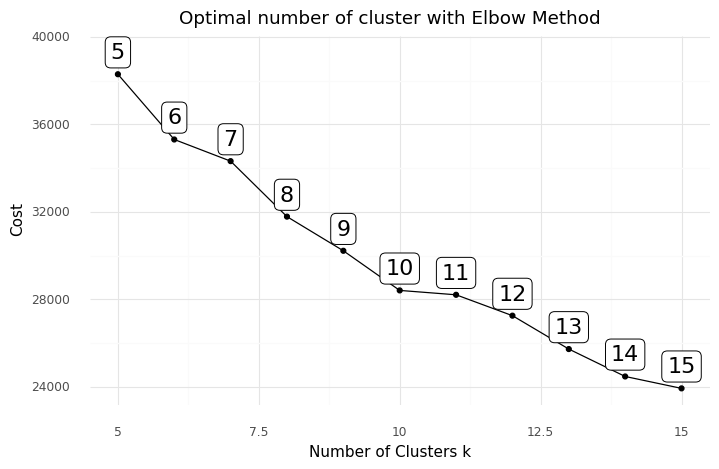

<ggplot: (8751505362329)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 16,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 6, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

array([4, 4, 0, ..., 1, 1, 1], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dfK = dfgo.copy()

# Add the cluster to the dataframe
dfK['Cluster Labels'] = kmodes.labels_
dfK['Segment'] = dfK['Cluster Labels'].map({0:'1',1:'2',2:'3',3:'4',4:'5',5:'6'})

# Order the cluster
dfK['Segment'] = dfK['Segment'].astype('category')
dfK['Segment'] = dfK['Segment'].cat.reorder_categories(['1', '2', '3','4','5','6'])

# Columns for centroids
list_col = ['customerID', 'Cluster Labels', 'Segment']
cols = [col for col in dfK if col not in list_col]
cols

index = ['1', '2','3','4','5','6']

In [ ]:
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,Descriptor,Duration Type,Resolved Type,Location Type
1,Noise,"(63.33, 2677.65]",no_violation,Street/Sidewalk
2,House,"(2677.65, 59476.62]",no_violation,Residential Building/House
3,Traffic,"(2677.65, 59476.62]",no_violation,Street/Sidewalk
4,Noise,"(26.55, 63.33]",no_violation,Residential Building/House
5,Noise,"(0.069, 26.55]",fixed,Street/Sidewalk
6,Traffic,"(63.33, 2677.65]",fixed,Street/Sidewalk


# Conclusion

**Cluster1,4,5:** 
* They are all noise related, with different duration type. 
* Compare cluster 5 and cluster 1, which have the same location type, we can tell that if the case can be fixed, it will be solved in a short time, however, if it is a case that hard to say it violate some laws or regulations, more investigation effort need to be made, hence result in a longer duration type;
* In cluster4, which happened in residential building or house, it mostly be the noise among neighbourhood so it hard to define it has violations and then result in a little longer period, but also because it happend in residential building involed with limited liability party, so it still in a short duration kind.


**Cluster3,6:** 
* These are two traffic related clusters with same location type but different duration and also resolved type; For cluster6, it could more be related with parking issues which have a shorter handling period; As for cluster3, it includes more of road issue, to solve those, more departments will be involved and result in a longer processing time.


**Cluster2:** 
* For this cluster, because of the nature of the cases, which need permission to come into the home or room to solve, it will require a rather long processing time. And most of them are not very serious things, which result in a resolved type of no_violation.

## Appendix
#### clustering experiment results

In [ ]:
from google.colab import files
from io import BytesIO
uploaded = files.upload()


Saving gower_initial.jpg to gower_initial.jpg


In [ ]:
%pip install PIL

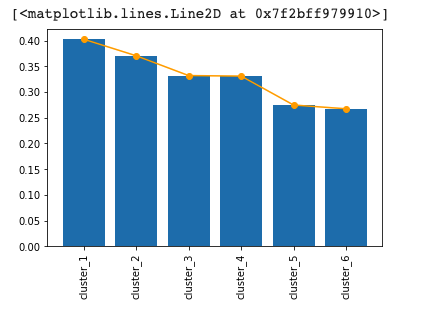

In [ ]:
## gower distance silimarity within clusters
## since gower distance takes heavy computations we just include the result here
## results using all categorical data as input
from PIL import Image
im = Image.open(BytesIO(uploaded['gower_initial.jpg']))
im

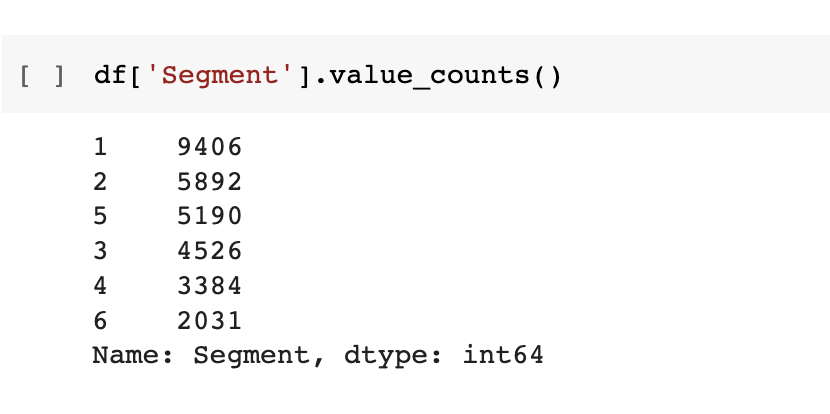

In [ ]:
from PIL import Image
im1 = Image.open(BytesIO(uploaded['cluster_results.jpg']))
im1